# Task 2

---

## Predictive modeling of customer bookings

The overall goal is to build a predictive model to understand factors that influence buying behaviour. Specifically, a machine learning model - **RandomForest** will be trained to predict the target outcome, which is a customer making a booking.

After training the model, performance evaluation is conducted via cross-validation and outputting appropriate evaluation metrics. Finally, more visualisation will be produced to interpret how each variable contributed to the model. 


### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv("Data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
# Dataset dimensions and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Let's check if missing values still exist in the dataset.

In [ ]:
# Check for missing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Before we compute any statistics on the data, let's encode all available categorical variables.

In [ ]:
# Import encoding libraries
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a copy of the DataFrame for encoding
df_encoded = df.copy()
label_encoders = {}

In [ ]:
# Loop through each column and apply Label Encoding
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


All data features are now in numerical format, let's produce the predictive model.

### Train RandomForest Regression Model

In [14]:
# Define features and target
X = df_encoded.drop(columns=["booking_complete"])
y = df_encoded["booking_complete"]

In [15]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Prodict on the test set
y_pred = model.predict(X_test)

### Evaluate model and present findings

In [19]:
# Import evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Predict and evaluate
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

In [23]:
# Display the classification report and confusion matrix
report

{'0': {'precision': 0.8612936344969199,
  'recall': 0.9864769520225776,
  'f1-score': 0.919644814733611,
  'support': 8504.0},
 '1': {'precision': 0.5576923076923077,
  'recall': 0.09692513368983957,
  'f1-score': 0.16514806378132119,
  'support': 1496.0},
 'accuracy': 0.8534,
 'macro avg': {'precision': 0.7094929710946138,
  'recall': 0.5417010428562086,
  'f1-score': 0.5423964392574661,
  'support': 10000.0},
 'weighted avg': {'precision': 0.8158748760069499,
  'recall': 0.8534,
  'f1-score': 0.8067721007911485,
  'support': 10000.0}}

Model Performance Summary: 

- Class 0 (No Booking):

    - Precision: 0.86
    - Recall: 0.99
    - F1-score: 0.92

    → Model is excellent at predicting non-bookings (majority class).

- Class 1 (Booking):

    - Precision: 0.56
    - Recall: 0.09
    - F1-score: 0.16

    → Model misses most actual bookings, indicating poor performance on the minority class.

-   Overall Accuracy: 85.3%

    - Misleading due to class imbalance — driven by correct predictions of "no booking".

- Macro F1-score: 0.54

    - Averages both classes equally → reflects poor balance.

- Weighted F1-score: 0.81

    - Skewed toward majority class performance.

Despite high accuracy, the model fails to detect bookings effectively (very low recall for class 1). This is a typical issue in **imbalanced classification**, and further steps like resampling or class weighting are needed to improve recall for the target class.

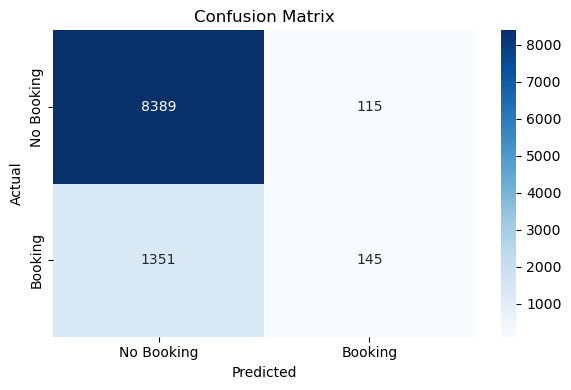

In [20]:
# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Booking', 'Booking'], yticklabels=['No Booking', 'Booking'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

The model is heavily biased toward predicting "no booking", which is likely because:

- Class 1 (bookings) is **underrepresented** (only ~15% of data).

- This causes the model to favor the majority class.